<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/PytorchAutoregressiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

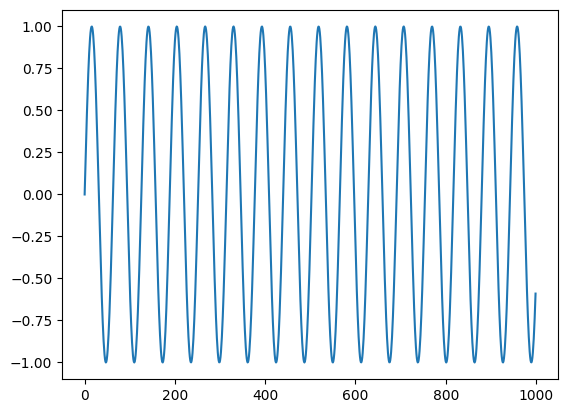

In [2]:
N = 1000
series = np.sin(0.1 * np.arange(N)) # np.random.randn(N) * 0.1

plt.plot(series)

In [3]:
# lets build dataset to predict next value  using past T values
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

# shape of  X will be N*T, and Y will be N
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print(X.shape, Y.shape)

(990, 10) (990, 1)


In [4]:
model = nn.Linear(T, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [5]:
X_train = torch.from_numpy(X[:N//2].astype(np.float32))
Y_train = torch.from_numpy(Y[:N//2].astype(np.float32))
X_test = torch.from_numpy(X[N//2:].astype(np.float32))
Y_test = torch.from_numpy(Y[N//2:].astype(np.float32))

In [6]:
EPOCHS = 100
train_losses = np.zeros(EPOCHS)
test_losses = np.zeros(EPOCHS)

for epoch in range(EPOCHS):
    optimizer.zero_grad()

    y_pred = model(X_train)
    loss = loss_fn(y_pred, Y_train)

    loss.backward()
    optimizer.step()

    train_losses[epoch] = loss.item()

    # saving test loss also
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, Y_test)
    test_losses[epoch] = test_loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch 10/100, Train Loss: 0.1028, Test Loss: 0.0930
Epoch 20/100, Train Loss: 0.0308, Test Loss: 0.0269
Epoch 30/100, Train Loss: 0.0040, Test Loss: 0.0031
Epoch 40/100, Train Loss: 0.0002, Test Loss: 0.0003
Epoch 50/100, Train Loss: 0.0009, Test Loss: 0.0009
Epoch 60/100, Train Loss: 0.0006, Test Loss: 0.0005
Epoch 70/100, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 80/100, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 90/100, Train Loss: 0.0000, Test Loss: 0.0000
Epoch 100/100, Train Loss: 0.0000, Test Loss: 0.0000


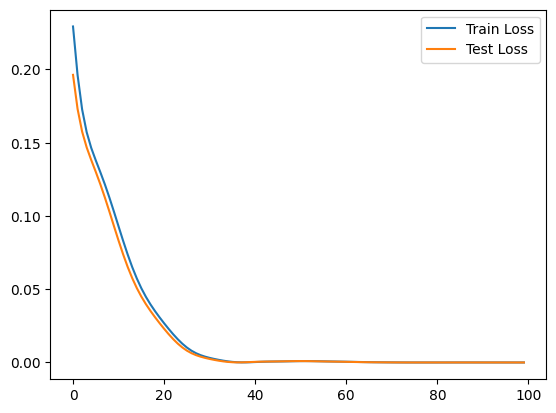

In [7]:
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()

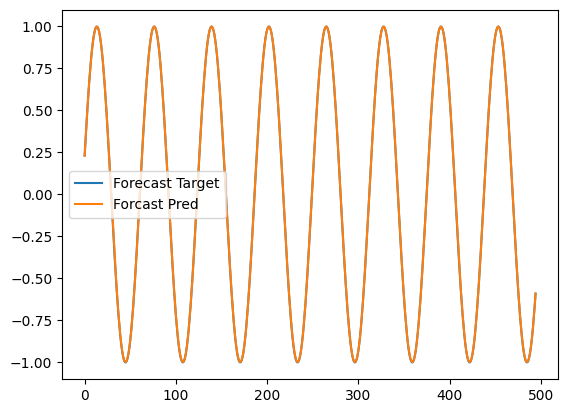

In [8]:
# WRONG forecast using true targets
validation_targets = Y[N//2:]
validation_predictions = []

i = 0
while len(validation_predictions) < len(validation_targets):
    input = X_test[i].view(1, -1)
    pred = model(input)[0, 0].item() # 1x1 array to scaler
    validation_predictions.append(pred)
    i += 1

plt.plot(validation_targets, label = 'Forecast Target')
plt.plot(validation_predictions, label = 'Forcast Pred')
plt.legend()

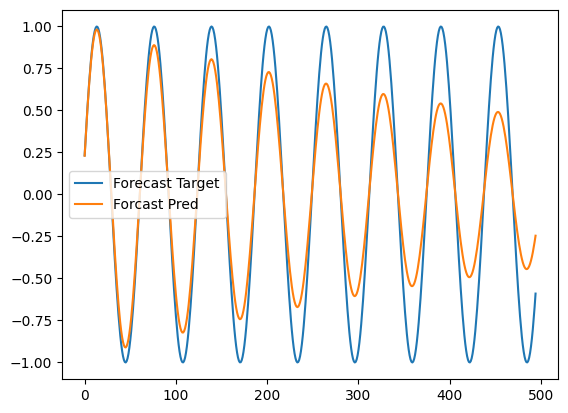

In [11]:
# Ideally we should forecast future values using slf-predictions instead of using true targets
validation_targets = Y[N//2:]
validation_preds = []

# get the last train input, and we will use it to forecast multistep values
last_x = torch.from_numpy(X[-N//2].astype(np.float32))
i = 0
while len(validation_preds) < len(validation_targets):
    pred = model(last_x.view(1, -1))
    validation_preds.append(pred[0, 0].item())
    # if last_x was [1,2,3] we  predict 4, now  we update last_x to [2,3,4] i.e using self predictions
    last_x = torch.cat((last_x[1:], pred[0]))
    i += 1

plt.plot(validation_targets, label = 'Forecast Target')
plt.plot(validation_preds, label = 'Forcast Pred')
plt.legend()

In [12]:
# see pred is 2d tensor, therefore we can concat last_x with pred[0]
pred

tensor([[-0.2454]], grad_fn=<AddmmBackward0>)

In [ ]:
# Now we  executed all this when timeseries had no noise, you can add noise and check what changes